In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt


In [2]:
audios_dir = r'C:/Users/Chaitanya/Desktop/dsp/tensorflow-speech-recognition-challenge/train/audio/'

In [3]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

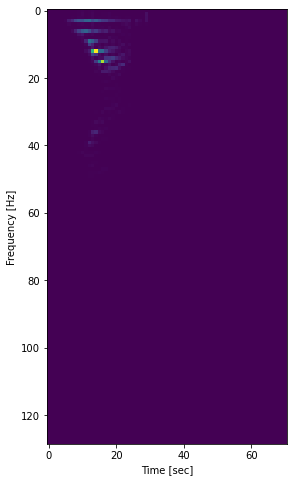

In [4]:
sample_rate, samples = wavfile.read(r'C:/Users/Chaitanya/Desktop/dsp/tensorflow-speech-recognition-challenge/train/audio/yes/00f0204f_nohash_1.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [5]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            
            # update the data and labels lists, respectively
            if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
                data.append(spectrogram[:128,:48])
                labels.append(d)
            #else:
             #   print(spectrogram.shape)

down
go
left
no
off
on
right
stop
up
yes


In [6]:
data = np.array(data)

data.shape

(23455, 128, 48)

In [7]:
values,count = np.unique(labels,return_counts=True)

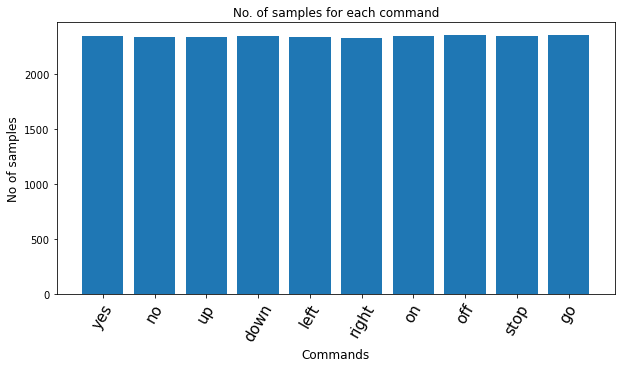

In [8]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [9]:
labels_backup = labels
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [10]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [11]:
labels_categoricals = to_categorical(ls)
labels_categoricals.shape

(23455, 10)

In [12]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [13]:
del data
del labels_categoricals
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (14073, 128, 48)
Cross-Validation data size :  (4691, 128, 48)
Test data size :  (4691, 128, 48)


In [14]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [15]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14073 and each image is of shape : (14073, 128, 48, 1)
Number of cross validation examples : 4691 and each image is of shape : (4691, 128, 48, 1)
Number of testing examples : 4691 and each image is of shape : (4691, 128, 48, 1)


In [16]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 100
batch_size = 64
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [17]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [18]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 48, 8)        40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 48, 16)       528       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 24, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 24, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 64, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 24, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 24, 64)        8

In [19]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [20]:
history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/100
220/220 [==============================] - 168s 762ms/step - loss: 2.7076 - accuracy: 0.1057 - val_loss: 2.3700 - val_accuracy: 0.1027
Epoch 2/100
220/220 [==============================] - 167s 759ms/step - loss: 2.3263 - accuracy: 0.1133 - val_loss: 2.2853 - val_accuracy: 0.1524
Epoch 3/100
220/220 [==============================] - 162s 738ms/step - loss: 2.2400 - accuracy: 0.1457 - val_loss: 2.1945 - val_accuracy: 0.1891
Epoch 4/100
220/220 [==============================] - 156s 710ms/step - loss: 2.1882 - accuracy: 0.1614 - val_loss: 2.1059 - val_accuracy: 0.2181
Epoch 5/100
220/220 [==============================] - 160s 729ms/step - loss: 2.1508 - accuracy: 0.1860 - val_loss: 13.1040 - val_accuracy: 0.1038
Epoch 6/100
220/220 [==============================] - 193s 876ms/step - loss: 2.0935 - accuracy: 0.2051 - val_loss: 7.2642 - val_accuracy: 0.1179
Epoch 7/100
220/220 [==============================] - 174s 792ms/step - loss: 2.0433 - accuracy: 0.2184 - val_loss: 

220/220 [==============================] - 162s 736ms/step - loss: 1.0961 - accuracy: 0.5984 - val_loss: 1.4837 - val_accuracy: 0.5001
Epoch 28/100
220/220 [==============================] - 161s 731ms/step - loss: 1.0785 - accuracy: 0.6100 - val_loss: 1.6594 - val_accuracy: 0.4394
Epoch 29/100
220/220 [==============================] - 161s 731ms/step - loss: 1.0511 - accuracy: 0.6237 - val_loss: 1.6037 - val_accuracy: 0.4451
Epoch 30/100
220/220 [==============================] - 163s 739ms/step - loss: 1.0188 - accuracy: 0.6313 - val_loss: 1.6475 - val_accuracy: 0.4325
Epoch 31/100
220/220 [==============================] - 162s 734ms/step - loss: 0.9978 - accuracy: 0.6367 - val_loss: 1.7821 - val_accuracy: 0.4121
Epoch 32/100
220/220 [==============================] - 162s 736ms/step - loss: 0.9672 - accuracy: 0.6522 - val_loss: 1.6732 - val_accuracy: 0.4715
Epoch 33/100
220/220 [==============================] - 162s 738ms/step - loss: 0.9558 - accuracy: 0.6583 - val_loss: 1.6421 

Epoch 54/100
220/220 [==============================] - 204s 928ms/step - loss: 0.6547 - accuracy: 0.7749 - val_loss: 1.0310 - val_accuracy: 0.6660
Epoch 55/100
220/220 [==============================] - 195s 887ms/step - loss: 0.6525 - accuracy: 0.7723 - val_loss: 1.9032 - val_accuracy: 0.4323
Epoch 56/100
220/220 [==============================] - 183s 830ms/step - loss: 0.6358 - accuracy: 0.7771 - val_loss: 1.5659 - val_accuracy: 0.5227
Epoch 57/100
220/220 [==============================] - 185s 839ms/step - loss: 0.6210 - accuracy: 0.7796 - val_loss: 1.2979 - val_accuracy: 0.6097
Epoch 58/100
220/220 [==============================] - 196s 889ms/step - loss: 0.6111 - accuracy: 0.7855 - val_loss: 0.9124 - val_accuracy: 0.7254
Epoch 59/100
220/220 [==============================] - 200s 910ms/step - loss: 0.6067 - accuracy: 0.7862 - val_loss: 1.2488 - val_accuracy: 0.5922
Epoch 60/100
220/220 [==============================] - 186s 844ms/step - loss: 0.6058 - accuracy: 0.7846 - val_

220/220 [==============================] - 185s 842ms/step - loss: 0.4750 - accuracy: 0.8345 - val_loss: 0.9734 - val_accuracy: 0.6834
Epoch 81/100
220/220 [==============================] - 178s 807ms/step - loss: 0.4731 - accuracy: 0.8364 - val_loss: 1.0660 - val_accuracy: 0.6638
Epoch 82/100
220/220 [==============================] - 186s 844ms/step - loss: 0.4641 - accuracy: 0.8392 - val_loss: 0.6198 - val_accuracy: 0.8037
Epoch 83/100
220/220 [==============================] - 188s 854ms/step - loss: 0.4548 - accuracy: 0.8382 - val_loss: 0.6140 - val_accuracy: 0.7936
Epoch 84/100
220/220 [==============================] - 184s 837ms/step - loss: 0.4466 - accuracy: 0.8436 - val_loss: 0.7734 - val_accuracy: 0.7623
Epoch 85/100
220/220 [==============================] - 185s 840ms/step - loss: 0.4589 - accuracy: 0.8417 - val_loss: 0.5936 - val_accuracy: 0.8060
Epoch 86/100
220/220 [==============================] - 183s 832ms/step - loss: 0.4523 - accuracy: 0.8427 - val_loss: 1.1205 

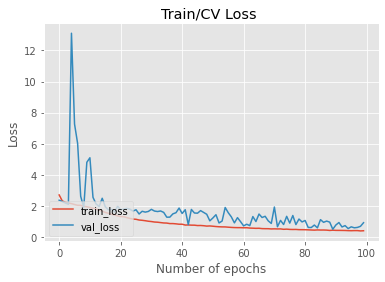

In [21]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss ")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend(loc="lower left")

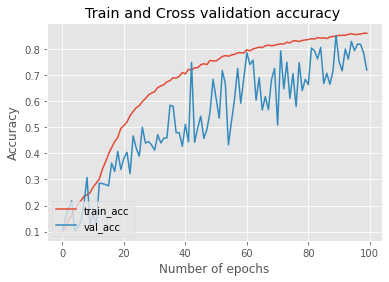

In [22]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and Cross validation accuracy ")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [23]:
best_acc = max(history.history["val_accuracy"])
best_acc*100

85.2057158946991

In [24]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [25]:
def plot_Confusion_Matrix(actual_labels,predict_labels,title):
    """This function plot the confusion matrix"""
    # Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cm = confusion_matrix(actual_labels, predict_labels)
    classNames = words
    cm_data = pd.DataFrame(cm,index = classNames,
                  columns = classNames)
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_data, annot=True,fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

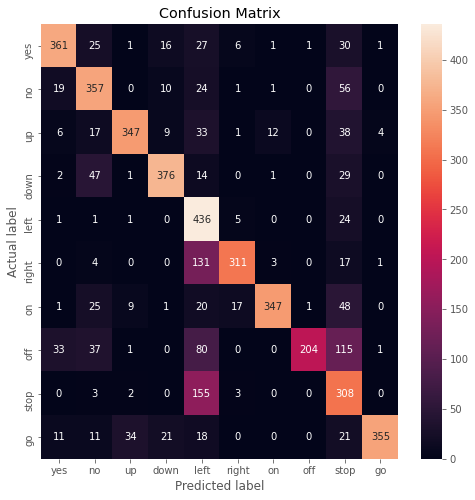

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot_Confusion_Matrix(testY.argmax(axis=1), predIdxs,"Confusion Matrix")